In [18]:
%matplotlib inline

import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

In [19]:
dfPrevRBs = pd.read_csv('final-csv-data/FantasyPrev-RBs.csv')
dfCurrRBs = pd.read_csv('final-csv-data/FantasyCurr-RBs.csv')

In [20]:
dfPrevRBs.head()

,Player,PrevADP,PrevFPoints,PrevFPPG,AgeAtDraft,2YRFPoints,2YRFPPG,2YRAvg,FPoints,FPointsPerGame,NYADP,BarginVal
0,David Johnson,1,328,20.5,25,174,10.9,251.0,7,14.0,3,0.9800
1,LeVeon Bell,2,242,20.2,24,87,14.5,164.5,259,17.3,1,63.3526
2,Ezekiel Elliot,3,293,19.5,21,150,10.0,221.5,177,17.7,4,54.2682
3,LeSean McCoy,8,248,16.5,28,147,12.3,197.5,205,12.8,36,74.2400
4,Devonta Freeman,10,232,14.5,24,243,16.2,237.5,164,11.7,17,60.7230


In [21]:
prevRBTest = dfPrevRBs.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]]
currRBTest = dfCurrRBs.iloc[:, [1,2,3,4,5,6,7]]
prevRBNames = dfPrevRBs.iloc[:,0]
currRBNames = dfCurrRBs.iloc[:,0]

In [22]:
prevRBTest.head()

,PrevADP,PrevFPoints,PrevFPPG,AgeAtDraft,2YRFPoints,2YRFPPG,2YRAvg,FPoints,FPointsPerGame,NYADP,BarginVal
0,1,328,20.5,25,174,10.9,251.0,7,14.0,3,0.9800
1,2,242,20.2,24,87,14.5,164.5,259,17.3,1,63.3526
2,3,293,19.5,21,150,10.0,221.5,177,17.7,4,54.2682
3,8,248,16.5,28,147,12.3,197.5,205,12.8,36,74.2400
4,10,232,14.5,24,243,16.2,237.5,164,11.7,17,60.7230


Previous Points and Next year Points: slope = 1.4919544846282617 , intercept = 47.24046007018079 , r_value = 0.517064540678081 , p_value = 0.00014235058384243706 , std_err = 0.36025371290798286


Text(0.5,1,'r = 0.517, p = 0.0, rsquared = 0.267')

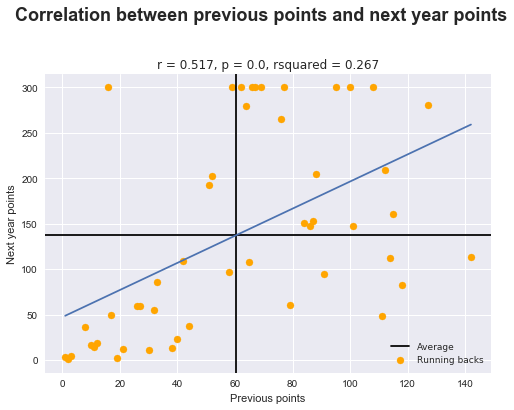

In [23]:
plt.style.use('seaborn')
fantRBs, ax = plt.subplots()

ax.scatter(dfPrevRBs['PrevADP'], dfPrevRBs['NYADP'], color = 'orange', label = "Running backs")
ax.axvline(x = np.mean(dfPrevRBs['PrevADP']), color = 'black')
ax.axhline(y = np.mean(dfPrevRBs['NYADP']), label = "Average", color = 'black')
fantRBs.suptitle("Correlation between previous points and next year points", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Previous points")
ax.set_ylabel("Next year points")

ax.plot(np.unique(dfPrevRBs['PrevADP']), np.poly1d(np.polyfit(dfPrevRBs['PrevADP'], dfPrevRBs['NYADP'],1))(np.unique(dfPrevRBs['PrevADP'])))

ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})

slope, intercept, r_value, p_value, std_err = linregress(dfPrevRBs['PrevADP'], dfPrevRBs['NYADP'])
print("Previous Points and Next year Points: slope =", slope, ", intercept =", intercept, ", r_value =", r_value, ", p_value =", p_value, ", std_err =", std_err)

rsquared = r_value**2
rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquared, 3))

ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
#yardsAllRBs.savefig('fantasyGraphs/CollegetoNFL-correlationDepth2Points.png', dpi = 400, bbox_inches = 'tight')

In [24]:
colArr = dfPrevRBs.iloc[:,[1,2,3,4,5,6,7]]
fyArr = dfPrevRBs.iloc[:, [8,9,10,11]]
rSquareArr = []
colUse = []
fyUse = []
for i in colArr:
    for j in fyArr:
        
        #plt.style.use('dark_background')

        #yardsAllRBs, ax = plt.subplots()
        
        slope,intercept, r_value, p_value, std_err = linregress(dfPrevRBs[i], dfPrevRBs[j])
        rsquaredArr1 = r_value**2
        rSquareArr.append(rsquaredArr1)
        colUse.append(i)
        fyUse.append(j)

        #ax.scatter(dfFYRBs[i], dfFYRBs[j], color = 'orange', label = "Running backs")
        #ax.axvline(x = np.mean(dfFYRBs[i]), color = 'white')
        #ax.axhline(y = np.mean(dfFYRBs[j]), label = "Average", color = 'white')
        #yardsAllRBs.suptitle("Correlation between "+i+" and "+j, weight = 'bold', size = 18, y = 1.05)
        #ax.set_xlabel(i)
        #ax.set_ylabel(j)

        #ax.plot(np.unique(dfFYRBs[i]), np.poly1d(np.polyfit(dfFYRBs[i], dfFYRBs[j],1))(np.unique(dfFYRBs[i])))

        #ax.legend(loc='best', prop={'size':9, "family":"DejaVu Sans"})
        #rpString = "r = " + str(round(r_value,3)) + ", p = " + str(round(p_value,3))+ ", rsquared = " + str(round(rsquaredArr1, 3))

        #ax.set_title("%s"%rpString, size = 12, fontname = 'DejaVu Sans')
        #yardsAllRBs.savefig('newGraphs/CollegetoNFL-correlation'+i+'to'+j+'.png', dpi = 400, bbox_inches = 'tight')
for n,m,f in zip(rSquareArr,colUse,fyUse):
    print(n,m,f)


0.2880818201648026 PrevADP FPoints
0.46958756531826357 PrevADP FPointsPerGame
0.2673557392266349 PrevADP NYADP
0.030521293468486303 PrevADP BarginVal
0.1755642865835761 PrevFPoints FPoints
0.3491513695240906 PrevFPoints FPointsPerGame
0.24334757962416378 PrevFPoints NYADP
0.030674417897303574 PrevFPoints BarginVal
0.14598536076057472 PrevFPPG FPoints
0.26523740065865403 PrevFPPG FPointsPerGame
0.13803181094665573 PrevFPPG NYADP
0.006941344486087189 PrevFPPG BarginVal
0.03586023732520718 AgeAtDraft FPoints
0.06876707495612391 AgeAtDraft FPointsPerGame
0.17489173259328356 AgeAtDraft NYADP
0.019997652351729546 AgeAtDraft BarginVal
0.03590828237905986 2YRFPoints FPoints
0.059033586940112764 2YRFPoints FPointsPerGame
0.02136897313457149 2YRFPoints NYADP
0.03307542655202098 2YRFPoints BarginVal
0.14288116655401523 2YRFPPG FPoints
0.16924845699126992 2YRFPPG FPointsPerGame
0.048489928412744694 2YRFPPG NYADP
0.06942553280718422 2YRFPPG BarginVal
0.16438488411689267 2YRAvg FPoints
0.31160247588

[[0.006941344486087189, 'PrevFPPG', 'BarginVal'], [0.019997652351729546, 'AgeAtDraft', 'BarginVal'], [0.02136897313457149, '2YRFPoints', 'NYADP'], [0.030521293468486303, 'PrevADP', 'BarginVal'], [0.030674417897303574, 'PrevFPoints', 'BarginVal'], [0.03307542655202098, '2YRFPoints', 'BarginVal'], [0.03586023732520718, 'AgeAtDraft', 'FPoints'], [0.03590828237905986, '2YRFPoints', 'FPoints'], [0.048489928412744694, '2YRFPPG', 'NYADP'], [0.05144907574347388, '2YRAvg', 'BarginVal'], [0.059033586940112764, '2YRFPoints', 'FPointsPerGame'], [0.06876707495612391, 'AgeAtDraft', 'FPointsPerGame'], [0.06942553280718422, '2YRFPPG', 'BarginVal'], [0.13803181094665573, 'PrevFPPG', 'NYADP'], [0.14288116655401523, '2YRFPPG', 'FPoints'], [0.14598536076057472, 'PrevFPPG', 'FPoints'], [0.16438488411689267, '2YRAvg', 'FPoints'], [0.16924845699126992, '2YRFPPG', 'FPointsPerGame'], [0.17489173259328356, 'AgeAtDraft', 'NYADP'], [0.1755642865835761, 'PrevFPoints', 'FPoints'], [0.18867682908549285, '2YRAvg', 'N

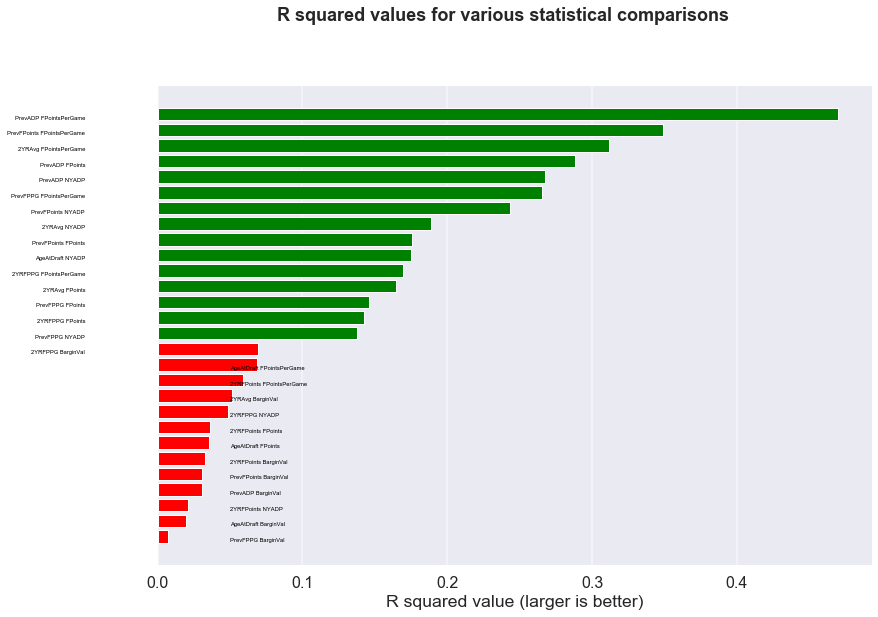

In [25]:
plt.style.use('seaborn-poster')

compareStats, ax = plt.subplots()

statsGraph = []
for i in rSquareArr:
    statsGraph.append(float(i))
combinedStats = [[i,j,k] for i,j,k in zip(statsGraph,colUse,fyUse)]


sortedRSquared = sorted(combinedStats, key = itemgetter(0))
print(sortedRSquared)

sortedRSquaredData = [row[0] for row in sortedRSquared]
y_pos = np.arange(len(sortedRSquaredData))

colorList = []

for i in sortedRSquaredData:
    if i < 0.1:
        colorList.append('red')
    elif i > 0.1:
        colorList.append('green')
        
ax.barh(y_pos,sortedRSquaredData,color = colorList, edgeColor = 'white', linewidth=1)

labels = [row[1]+' '+row[2] for row in sortedRSquared]

rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_y()
    if rect.get_y() < 11:
        ax.text(rect.get_x() + .05, height, label, ha='left', fontsize = 'xx-small', va='bottom', color = 'black')
    elif rect.get_y() >=11:
        ax.text(rect.get_x() - .05,height,label,ha='right',va='bottom',fontsize = 'xx-small',color='black')

compareStats.suptitle("R squared values for various statistical comparisons", weight = 'bold', size = 18, y = 1.005)
ax.yaxis.set_visible(False)
ax.set_xlabel("R squared value (larger is better)")
ax.grid(alpha = .5)
compareStats.savefig('fantasyGraphs/RBRSquared.png', dpi = 400, bbox_inches = 'tight')

In [62]:
train, test = train_test_split(dfPrevRBs, test_size = 0.25, random_state = 99)

xtrainRB = train[['PrevADP','PrevFPoints','PrevFPPG','AgeAtDraft','2YRFPoints','2YRFPPG','2YRAvg']]
ytrainRB = train[['NYADP']].astype(int)

xtestRB = test[['PrevADP','PrevFPoints','PrevFPPG','AgeAtDraft','2YRFPoints','2YRFPPG','2YRAvg']]
ytestRB = test[['NYADP']].astype(int)

#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(xtrainRB,ytrainRB)
#knn.score(xtestRB,ytestRB)
#print(knn.kneighbors(xtrain, return_distance=False))

In [63]:
linReg = linear_model.LinearRegression(fit_intercept = False)
linReg.fit(xtrainRB,ytrainRB)

y_predLinRB = linReg.predict(xtestRB)
linR2RB = abs(1/(r2_score(ytestRB,y_predLinRB)))
print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predLinRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predLinRB))

cvScoreLin = cross_val_score(linReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLin.mean(), cvScoreLin.std()*2))
print(linR2RB)

Mean squared error: 5795.974
Variance score: 0.392
Accuracy (cross validation score): 0.06 (+/- 1.67)
2.5517823078805395


In [64]:
ridgeReg = linear_model.Ridge(alpha=5, fit_intercept = False)
ridgeReg.fit(xtrainRB,ytrainRB)

y_predRidgeRB = ridgeReg.predict(xtestRB)
ridgeR2RB = abs(1/(r2_score(ytestRB,y_predRidgeRB)))
print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predRidgeRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predRidgeRB))

cvScoreRidge = cross_val_score(ridgeReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreRidge.mean(), cvScoreRidge.std()*2))
print(ridgeR2RB)

Mean squared error: 5748.989
Variance score: 0.397
Accuracy (cross validation score): 0.57 (+/- 0.77)
2.520080507739657


In [65]:
lassoReg = linear_model.Lasso(alpha = 5, tol = 0.1, max_iter = 100000, fit_intercept = False)
lassoReg.fit(xtrainRB,ytrainRB)

y_predLassoRB = lassoReg.predict(xtestRB)
lassoR2RB = abs(1/(r2_score(ytestRB,y_predLassoRB)))
print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predLassoRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predLassoRB))

cvScoreLasso = cross_val_score(lassoReg,xtestRB,ytestRB,cv=4,scoring='explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)"%(cvScoreLasso.mean(), cvScoreLasso.std()*2))

print(lassoR2RB)

Mean squared error: 5517.136
Variance score: 0.421
Accuracy (cross validation score): 0.52 (+/- 0.73)
2.374513714911851


In [66]:
logReg = linear_model.LogisticRegression(fit_intercept = False, dual=False)
logReg.fit(xtrainRB,ytrainRB)

y_predLogRB = logReg.predict(xtestRB)

print("Mean squared error: %.3f"%mean_squared_error(ytestRB, y_predLogRB))
print("Variance score: %.3f"%r2_score(ytestRB,y_predLogRB))

Mean squared error: 45169.615
Variance score: -3.739


C:\Users\Kids\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
linear_rbs = linReg.predict(currRBTest)
for i,j in zip(linear_rbs, currRBNames):
    print(i,j)

[10.95374281] LeVeon Bell
[28.49507102] Todd Gurley
[263.86159094] David Johnson
[97.88017518] Ezekiel Elliot
[75.61957959] Saquon Barkley
[43.549577] Alvin Kamara
[41.04766253] Kareem Hunt
[85.91136961] Leonard Fournette
[208.8279123] Dalvin Cook
[33.65222769] Melvin Gordon
[105.52045441] Devonta Freeman
[71.07613351] Jordan Howard
[78.28669459] Christian McCaffery
[103.48480358] LeSean McCoy
[131.49301148] Jerick McKinnon
[109.55222154] Joe Mixon
[140.50950746] Kenyan Drake
[100.44003105] Royce Freeman
[100.89640781] Derrius Guice
[101.35278457] Ronald Jones
[127.02229234] Alex Collins
[102.26553809] Rashaad Penny
[126.21831805] Derrick Henry
[131.04555852] Jay Ajayi
[201.51836248] Marshawn Lynch
[106.82930571] Sony Michel
[134.85796163] Isaiah Crowell
[121.12944897] Lamar Miller
[111.02753036] Tevin Coleman
[137.91562721] Dion Lewis
[221.70781138] Rex Burkhead
[119.15147829] Kerryon Johnson
[123.71492297] Carlos Hyde
[142.49611374] Marlon Mack
[131.53600715] Jamaal Williams
[150.356

In [68]:
ridge_rbs = ridgeReg.predict(currRBTest)
for i,j in zip(ridge_rbs, currRBNames):
    print(i,j)

[12.44128269] LeVeon Bell
[27.34947298] Todd Gurley
[261.72749549] David Johnson
[97.35860478] Ezekiel Elliot
[75.32829843] Saquon Barkley
[43.17405357] Alvin Kamara
[40.70976589] Kareem Hunt
[85.08040331] Leonard Fournette
[206.71322507] Dalvin Cook
[34.6175545] Melvin Gordon
[105.22157745] Devonta Freeman
[71.30869107] Jordan Howard
[78.31239385] Christian McCaffery
[103.89465092] LeSean McCoy
[131.11609942] Jerick McKinnon
[109.60235741] Joe Mixon
[139.68548976] Kenyan Drake
[100.49203521] Royce Freeman
[100.95892648] Derrius Guice
[101.42581774] Ronald Jones
[126.25039051] Alex Collins
[102.35960028] Rashaad Penny
[125.96314749] Derrick Henry
[131.35843055] Jay Ajayi
[199.93954011] Marshawn Lynch
[107.02851294] Sony Michel
[134.99472119] Isaiah Crowell
[121.61029052] Lamar Miller
[111.89999145] Tevin Coleman
[138.36401961] Dion Lewis
[220.46460845] Rex Burkhead
[119.63457715] Kerryon Johnson
[124.81604956] Carlos Hyde
[143.1588586] Marlon Mack
[132.30523116] Jamaal Williams
[150.33

In [69]:
lasso_rbs = lassoReg.predict(currRBTest)
for i,j in zip(lasso_rbs, currRBNames):
    print(i,j)

18.23287344469884 LeVeon Bell
23.70343561211257 Todd Gurley
256.2989357553648 David Johnson
96.58825069123586 Ezekiel Elliot
70.50536890480262 Saquon Barkley
39.3668804825096 Alvin Kamara
37.368452977250286 Kareem Hunt
82.34164378994569 Leonard Fournette
205.1389655956508 Dalvin Cook
36.022720310012005 Melvin Gordon
98.3676481002264 Devonta Freeman
67.15213819280748 Jordan Howard
74.45502490467001 Christian McCaffery
99.07337733967782 LeSean McCoy
125.67548209582543 Jerick McKinnon
106.66198886809268 Joe Mixon
134.6131299914661 Kenyan Drake
98.1836295196122 Royce Freeman
98.72886827974187 Derrius Guice
99.27410703987155 Ronald Jones
124.38728117628887 Alex Collins
100.36458456013102 Rashaad Penny
122.36185877477506 Derrick Henry
128.1382710198108 Jay Ajayi
193.21255727942804 Marshawn Lynch
105.81697216142797 Sony Michel
130.3424549470859 Isaiah Crowell
120.36588546088086 Lamar Miller
113.76685467922755 Tevin Coleman
142.65983946317243 Dion Lewis
218.4051448845356 Rex Burkhead
120.53841

In [70]:
log_rbs = logReg.predict(currRBTest)
for i,j in zip(log_rbs, currRBNames):
    print(i,j)

17 LeVeon Bell
4 Todd Gurley
17 David Johnson
17 Ezekiel Elliot
36 Saquon Barkley
59 Alvin Kamara
59 Kareem Hunt
300 Leonard Fournette
300 Dalvin Cook
2 Melvin Gordon
17 Devonta Freeman
2 Jordan Howard
300 Christian McCaffery
300 LeSean McCoy
300 Jerick McKinnon
300 Joe Mixon
300 Kenyan Drake
300 Royce Freeman
300 Derrius Guice
300 Ronald Jones
300 Alex Collins
300 Rashaad Penny
300 Derrick Henry
300 Jay Ajayi
50 Marshawn Lynch
300 Sony Michel
300 Isaiah Crowell
300 Lamar Miller
97 Tevin Coleman
153 Dion Lewis
300 Rex Burkhead
281 Kerryon Johnson
97 Carlos Hyde
49 Marlon Mack
49 Jamaal Williams
153 Duke Johnson
49 Tarik Cohen
281 Mark Ingram
281 Nick Chubb
300 Chris Thompson
209 Chris Carson
153 C.J. Anderson
300 Ty Montgomery
153 Giovani Bernard
97 Latavius Murray
281 Jordan Wilkins
209 James White
49 Theo Riddick
209 Devontae Booker


In [71]:
averageProd = []
for i,j,h in zip(linear_rbs,ridge_rbs,lasso_rbs):
    averageProd.append(float((i*linR2RB+j*ridgeR2RB+h*lassoR2RB)/(linR2RB+ridgeR2RB+lassoR2RB)))

combinedAvg = [[i,j] for i,j in zip(currRBNames, averageProd)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1))
print(sortedAvg)

[['LeVeon Bell', 13.77835363737904], ['Todd Gurley', 26.579400598615162], ['Melvin Gordon', 34.734830549031585], ['Kareem Hunt', 39.760075173497576], ['Alvin Kamara', 42.08870277946928], ['Jordan Howard', 69.90354750510473], ['Saquon Barkley', 73.89017263222259], ['Christian McCaffery', 77.07354239513664], ['Leonard Fournette', 84.49182483525907], ['Ezekiel Elliot', 97.29168871232648], ['Royce Freeman', 99.73810552891841], ['Derrius Guice', 100.22637719055821], ['Ronald Jones', 100.71464885219804], ['Rashaad Penny', 101.69119217547767], ['LeSean McCoy', 102.2167849955632], ['Devonta Freeman', 103.13840582306501], ['Sony Michel', 106.57390879187574], ['Joe Mixon', 108.64754653827534], ['Tevin Coleman', 112.19631833608763], ['C.J. Anderson', 117.60074780025131], ['Kerryon Johnson', 119.75724365615056], ['Lamar Miller', 121.04869390588877], ['Derrick Henry', 124.9022060112666], ['Carlos Hyde', 125.39371741461447], ['Alex Collins', 125.92080023958074], ['Nick Chubb', 126.10477525746806], [